In [387]:
import pandas as pd
import numpy as np
import yaml
import seaborn as sns
from sklearn.linear_model import Ridge, LinearRegression, QuantileRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import RidgeCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [388]:
cfg = None
with open('config.yaml', 'r') as config:
    cfg = yaml.safe_load(config)["Lab_6"]

# Blood.xlsx

In [389]:
df = pd.read_excel(cfg["Blood"])

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      11 non-null     int64
 1   X2      11 non-null     int64
 2   X3      11 non-null     int64
dtypes: int64(3)
memory usage: 396.0 bytes


In [391]:
df.head(11)

,X1,X2,X3
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196
5,168,74,220
6,137,54,188
7,149,61,188
8,159,65,207
9,128,46,167


In [392]:
df.describe()

,X1,X2,X3
count,11.000000,11.000000,11.000000
mean,150.090909,62.454545,195.000000
std,13.626845,9.114424,17.314734
min,128.000000,46.000000,167.000000
25%,140.000000,56.500000,186.000000
50%,153.000000,64.000000,194.000000
75%,160.500000,69.500000,209.000000
max,168.000000,74.000000,220.000000


In [393]:
X = df.drop(columns=["X1"], axis=1)
y = df['X1']

In [394]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
print(
    f"MSE: {round(mean_squared_error(y_test, y_pred), 3)}\nR^2: {round(r2_score(y_test, y_pred),3)}"
)

MSE: 7.147
R^2: 0.836


In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      11 non-null     int64
 1   X2      11 non-null     int64
 2   X3      11 non-null     int64
dtypes: int64(3)
memory usage: 396.0 bytes


In [396]:
df.head(10)

,X1,X2,X3
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196
5,168,74,220
6,137,54,188
7,149,61,188
8,159,65,207
9,128,46,167


In [397]:
df.describe()

,X1,X2,X3
count,11.000000,11.000000,11.000000
mean,150.090909,62.454545,195.000000
std,13.626845,9.114424,17.314734
min,128.000000,46.000000,167.000000
25%,140.000000,56.500000,186.000000
50%,153.000000,64.000000,194.000000
75%,160.500000,69.500000,209.000000
max,168.000000,74.000000,220.000000


In [398]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

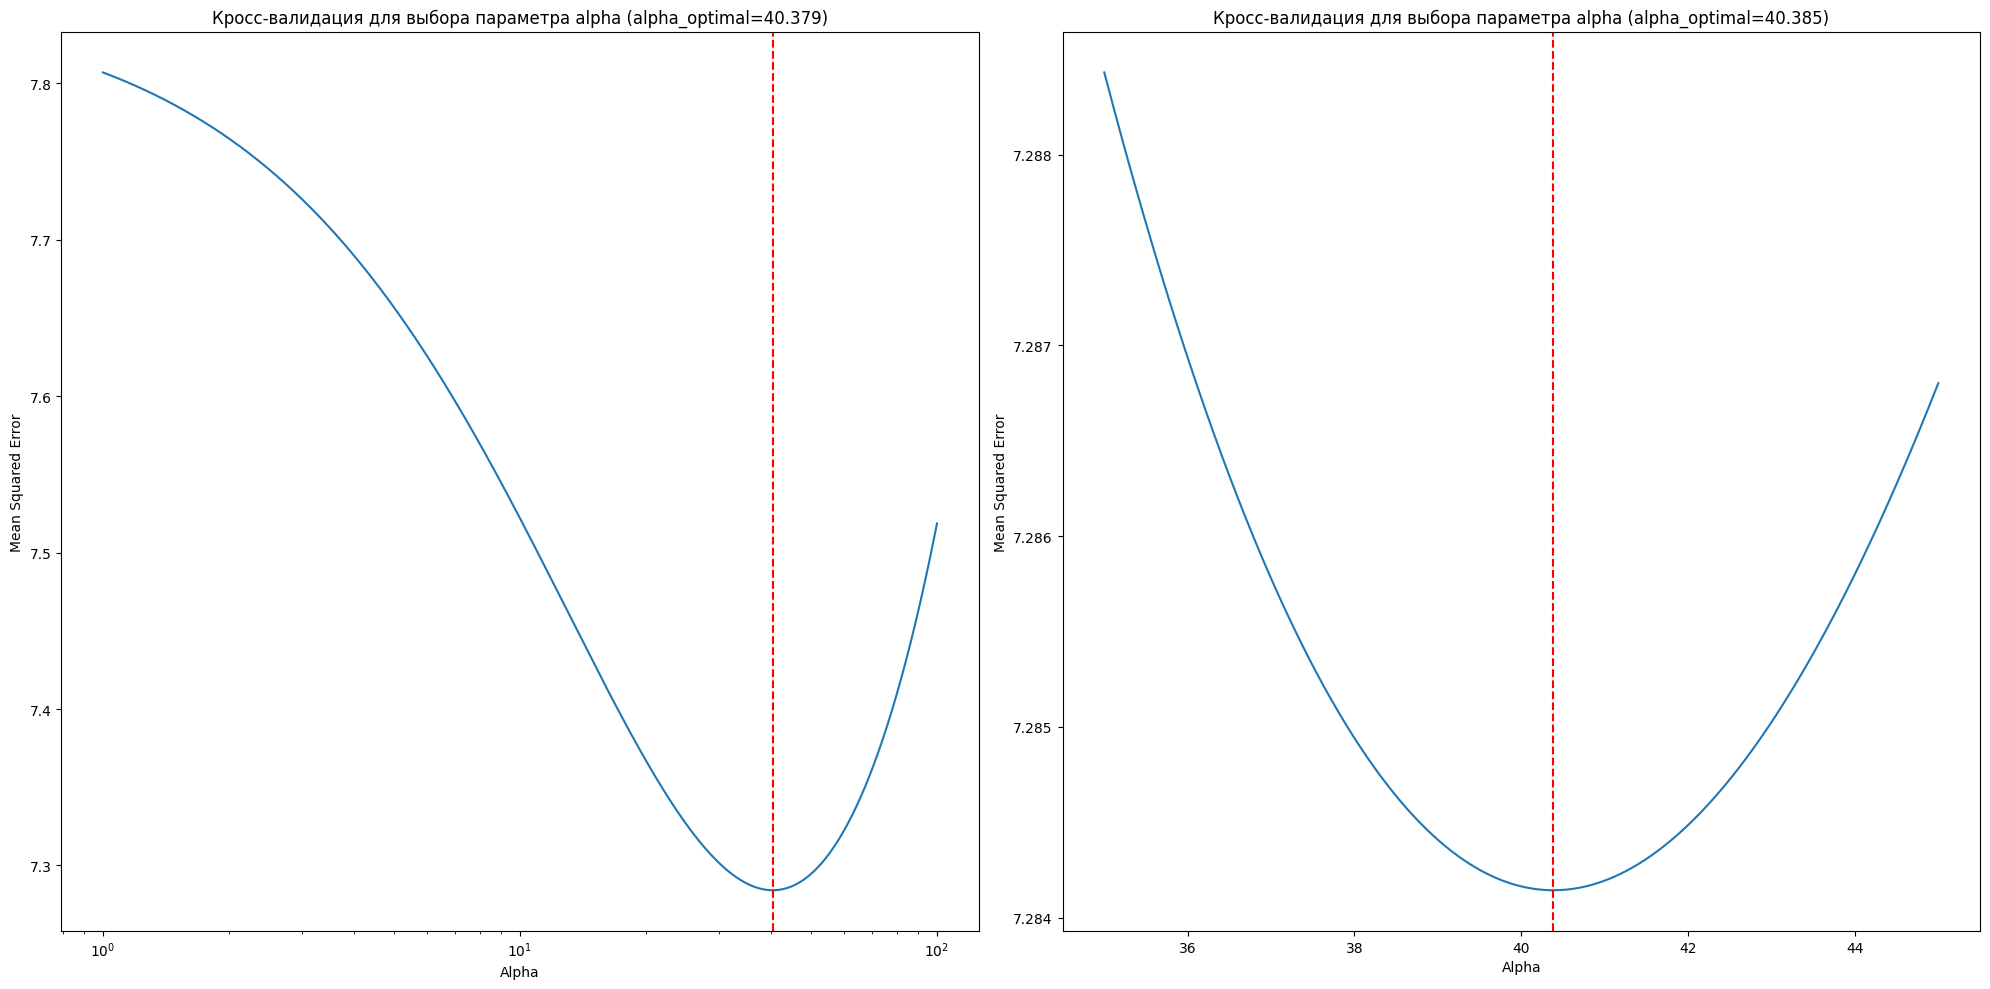

In [399]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Первый подграфик
ax = axes[0]
alphas = np.logspace(0, 2, 10**4)
ridge_cv = RidgeCV(alphas=alphas, store_cv_results=True)
ridge_cv.fit(X, y)
alpha_optimal_1 = ridge_cv.alpha_

mse_cv = np.mean(ridge_cv.cv_results_, axis=0)
ax.plot(alphas, mse_cv)
ax.axvline(ridge_cv.alpha_, linestyle='--', color='red', label=f'Optimal alpha = {alpha_optimal_1}')
ax.set_xscale('log')
ax.set_xlabel('Alpha')
ax.set_ylabel('Mean Squared Error')
ax.set_title(f'Кросс-валидация для выбора параметра alpha (alpha_optimal={round(alpha_optimal_1, 3)})')

# Второй подграфик
ax = axes[1]
alphas = np.linspace(35, 45, 10**4)
ridge_cv = RidgeCV(alphas=alphas, store_cv_results=True)
ridge_cv.fit(X, y)
alpha_optimal_2 = ridge_cv.alpha_

mse_cv = np.mean(ridge_cv.cv_results_, axis=0)
ax.plot(alphas, mse_cv)
ax.axvline(ridge_cv.alpha_, linestyle='--', color='red', label=f'Optimal alpha = {alpha_optimal_2}')
ax.set_xlabel('Alpha')
ax.set_ylabel('Mean Squared Error')
ax.set_title(f'Кросс-валидация для выбора параметра alpha (alpha_optimal={round(alpha_optimal_2, 3)})')

plt.tight_layout()  # Для компактного расположения графиков
plt.show()

alpha_optimal = alpha_optimal_2


Оптимальное $\alpha$ = 40.385

In [400]:
ridge_model = Ridge(alpha=alpha_optimal)
ridge_model.fit(X, y)
y_pred = ridge_model.predict(X)
print(
    f"MSE: {round(mean_squared_error(y, y_pred), 3)}\nR^2: {round(r2_score(y, y_pred),3)}"
)

MSE: 4.25
R^2: 0.975


Провера на коллинеарность:

В задаче восстановления регрессии фактор инфляции дисперсии (VIF) — мера мультиколлинеарности. Он позволяет оценить увеличение дисперсии заданного коэффициента регрессии, происходящее из-за высокой корреляции данных.

In [401]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Факторы вздутия дисперсии (VIF):\n", vif_data)

Факторы вздутия дисперсии (VIF):
   Feature         VIF
0      X2  241.333801
1      X3  241.333801


In [402]:
X.corr()

,X2,X3
X2,1.000000,0.946051
X3,0.946051,1.000000


Из VIF и Corr можно сделать вывод, что параметры имеют очень сильную корреляцию

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

ridge_model = Ridge(alpha=alpha_optimal)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

pd.DataFrame(
    {
        "MSE": [round(mean_squared_error(y_test, y_pred_ridge), 3), round(mean_squared_error(y_test, y_pred_linear), 3)],
        "R^2": [round(r2_score(y_test, y_pred_ridge), 3), round(r2_score(y_test, y_pred_linear), 3)]
    },
    index=["Ridge", "Linear"]
)

,MSE,R^2
Ridge,15.600,0.908
Linear,8.494,0.950


Из результатов видно, что Ridge-регрессия работает лучше 

# Kuiper.xlsx

In [404]:
df = pd.read_excel(cfg["Kuiper"])
df = df[['Price', 'Mileage', 'Liter', 'Cruise', 'Sound', 'Leather']]

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Price    804 non-null    float64
 1   Mileage  804 non-null    int64  
 2   Liter    804 non-null    float64
 3   Cruise   804 non-null    int64  
 4   Sound    804 non-null    int64  
 5   Leather  804 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 37.8 KB


In [406]:
df.head(10)

,Price,Mileage,Liter,Cruise,Sound,Leather
0,17314.103129,8221,3.1,1,1,1
1,17542.036083,9135,3.1,1,1,0
2,16218.847862,13196,3.1,1,1,0
3,16336.913140,16342,3.1,1,0,0
4,16339.170324,19832,3.1,1,0,1
5,15709.052821,22236,3.1,1,1,0
6,15230.003390,22576,3.1,1,1,0
7,15048.042184,22964,3.1,1,1,0
8,14862.093870,24021,3.1,1,0,1
9,15295.018267,27325,3.1,1,1,1


In [407]:
df.describe()

,Price,Mileage,Liter,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,3.037313,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.105562,0.431836,0.467111,0.447355
min,8638.930895,266.000000,1.600000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,2.200000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,2.800000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,3.800000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,6.000000,1.000000,1.000000,1.000000


In [408]:
X = df.drop(columns=["Price"], axis=1)
y = df["Price"]

In [409]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [410]:
quantiles = [x / 10 for x in range(1, 10)]
quantile_models = {}
predictions = {}


for tau in quantiles:
    model = QuantileRegressor(quantile=tau, alpha=0)
    model.fit(X_train, y_train)
    predictions[tau] = model.predict(X_test)
    quantile_models[tau] = model

In [411]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

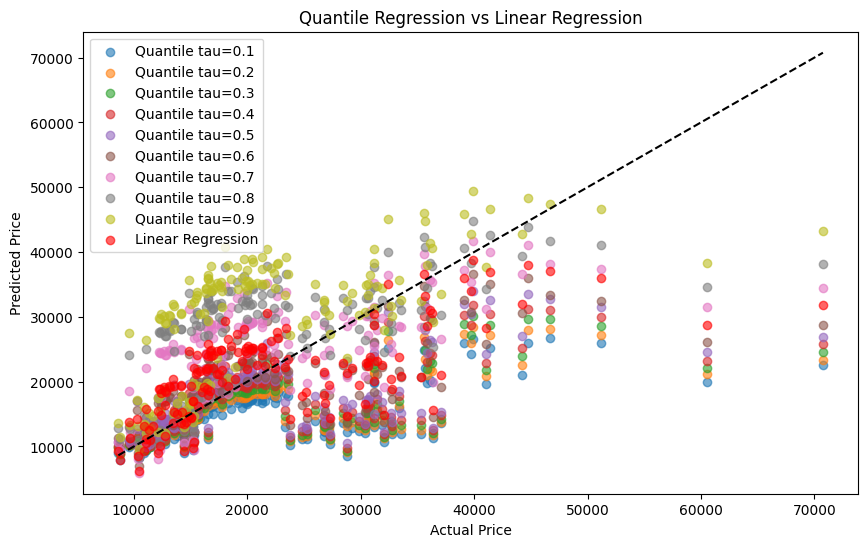

In [412]:
plt.figure(figsize=(10, 6))

# Визуализация квантильной регрессии для каждого значения tau
for tau in quantiles:
    plt.scatter(y_test, predictions[tau], label=f"Quantile tau={tau}", alpha=0.6)
plt.scatter(y_test, linear_predictions, color='red', label='Linear Regression', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Quantile Regression vs Linear Regression")
plt.legend()
plt.show()

In [413]:
# Сравнение моделей по среднеквадратичной ошибке
print("Mean Squared Error (MSE):")
for tau in quantiles:
    mse = mean_squared_error(y_test, predictions[tau])
    print(f"Quantile Regression tau={tau}: MSE = {mse:.2f}")

linear_mse = mean_squared_error(y_test, linear_predictions)
print(f"Linear Regression: MSE = {linear_mse:.2f}")

Mean Squared Error (MSE):
Quantile Regression tau=0.1: MSE = 117770657.67
Quantile Regression tau=0.2: MSE = 106733949.38
Quantile Regression tau=0.3: MSE = 97872703.38
Quantile Regression tau=0.4: MSE = 89142979.48
Quantile Regression tau=0.5: MSE = 80690471.68
Quantile Regression tau=0.6: MSE = 64640273.97
Quantile Regression tau=0.7: MSE = 71060399.49
Quantile Regression tau=0.8: MSE = 100693005.03
Quantile Regression tau=0.9: MSE = 143565529.25
Linear Regression: MSE = 60091093.01


**Вывод:** При определенных значениях $\tau$ квантильная регрессия работает чаще всего лучше

# Cigarettes.dat.txt

In [414]:
df = pd.read_csv(cfg["Cigarettes"], delim_whitespace=True, header=None, on_bad_lines='skip')
df = df.drop(columns=[0])
df.columns = ['y', 'x1', 'x2', 'x3']

/tmp/ipykernel_230039/2240496807.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(cfg["Cigarettes"], delim_whitespace=True, header=None, on_bad_lines='skip')


In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       25 non-null     float64
 1   x1      25 non-null     float64
 2   x2      25 non-null     float64
 3   x3      25 non-null     float64
dtypes: float64(4)
memory usage: 932.0 bytes


In [416]:
df.head(10)

,y,x1,x2,x3
0,14.1,0.86,0.9853,13.6
1,16.0,1.06,1.0938,16.6
2,29.8,2.03,1.1650,23.5
3,8.0,0.67,0.9280,10.2
4,4.1,0.40,0.9462,5.4
5,15.0,1.04,0.8885,15.0
6,8.8,0.76,1.0267,9.0
7,12.4,0.95,0.9225,12.3
8,16.6,1.12,0.9372,16.3
9,14.9,1.02,0.8858,15.4


In [417]:
df.describe()

,y,x1,x2,x3
count,25.00000,25.000000,25.000000,25.000000
mean,12.21600,0.876400,0.970284,12.528000
std,5.66581,0.354058,0.087721,4.739684
min,1.00000,0.130000,0.785100,1.500000
25%,8.60000,0.690000,0.922500,10.000000
50%,12.80000,0.900000,0.957300,13.000000
75%,15.10000,1.020000,1.007000,15.400000
max,29.80000,2.030000,1.165000,23.500000


In [418]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [419]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

In [420]:
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

quadratic_model = LinearRegression()
quadratic_model.fit(X_train_poly2, y_train)
quadratic_predictions = quadratic_model.predict(X_test_poly2)

In [421]:
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)

cubic_model = LinearRegression()
cubic_model.fit(X_train_poly3, y_train)
cubic_predictions = cubic_model.predict(X_test_poly3)

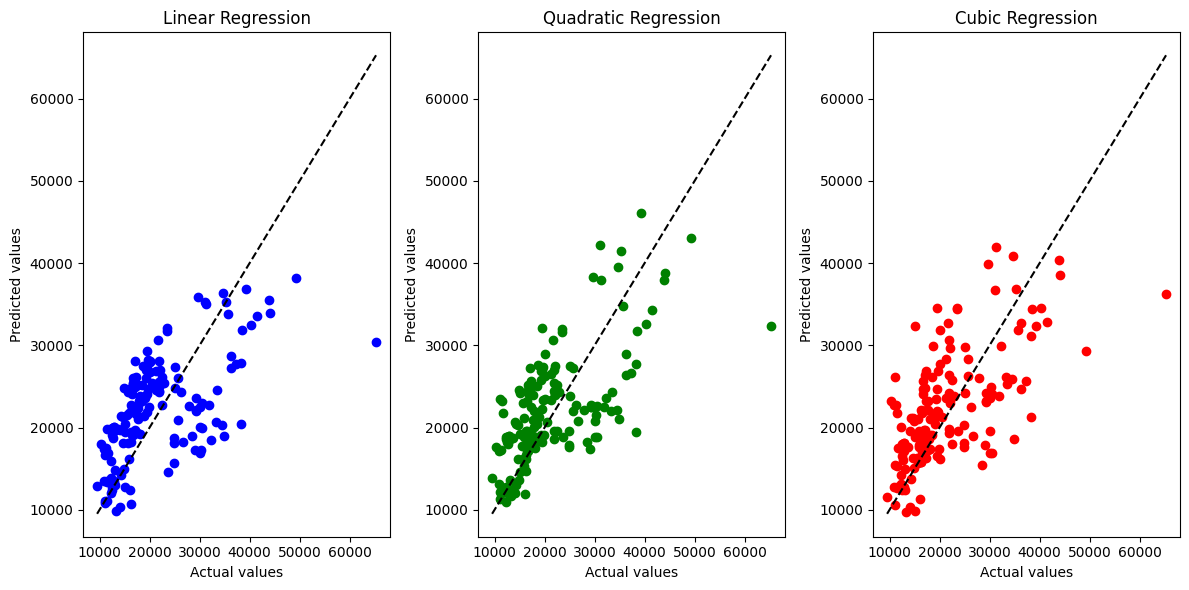

In [422]:
# Визуализация: график зависимости истинных значений от предсказанных для каждой модели
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, linear_predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.title('Linear Regression')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

plt.subplot(1, 3, 2)
plt.scatter(y_test, quadratic_predictions, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.title('Quadratic Regression')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

plt.subplot(1, 3, 3)
plt.scatter(y_test, cubic_predictions, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.title('Cubic Regression')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

plt.tight_layout()
plt.show()


In [423]:

linear_mse = mean_squared_error(y_test, linear_predictions)
quadratic_mse = mean_squared_error(y_test, quadratic_predictions)
cubic_mse = mean_squared_error(y_test, cubic_predictions)

print(f"Linear Regression MSE: {linear_mse:.2f}")
print(f"Quadratic Regression MSE: {quadratic_mse:.2f}")
print(f"Cubic Regression MSE: {cubic_mse:.2f}")

Linear Regression MSE: 52359126.43
Quadratic Regression MSE: 45088488.47
Cubic Regression MSE: 49006404.16


In [424]:
linear_mse > quadratic_mse, linear_mse > quadratic_mse, quadratic_mse > cubic_mse

(np.True_, np.True_, np.False_)

**Вывод:**
1. Наилучшее предсказание у квадратичной регрессии
2. Наибольший разброс у кубической регрессии
3. У квадратичной и кубической регрессии относительно близкие результаты, в то время как у линейной - хуже